# Branch Predictor Project Stats Aggregation & Visualization

## All predictor performance combined

In [1]:
import matplotlib.pyplot as plt

traces = []
gshare_rates = []
tournament_rates = []
custom_rates = []

with open('../combined_results.txt', 'r') as file:
    lines = file.readlines()

    for i, line in enumerate(lines):
        if '.bz2:' in line:
            trace = line.strip().replace('.bz2:', '')
            traces.append(trace)
        
        elif 'Gshare:' in line:
            j = i + 1
            while j < len(lines):
                if 'Misprediction Rate:' in lines[j]:
                    gshare_rate = float(lines[j].split()[-1])
                    gshare_rates.append(gshare_rate)
                    break
                j += 1
        
        elif 'Tournament:' in line:
            j = i + 1
            while j < len(lines):
                if 'Misprediction Rate:' in lines[j]:
                    tournament_rate = float(lines[j].split()[-1])
                    tournament_rates.append(tournament_rate)
                    break
                j += 1
        
        elif 'Custom:' in line:
            j = i + 1
            while j < len(lines):
                if 'Misprediction Rate:' in lines[j]:
                    custom_rate = float(lines[j].split()[-1])
                    custom_rates.append(custom_rate)
                    break
                j += 1

In [2]:
traces, gshare_rates, tournament_rates, custom_rates

(['int_1', 'int_2', 'fp_1', 'fp_2', 'mm_1', 'mm_2'],
 [13.839, 0.42, 0.825, 1.678, 6.696, 10.138],
 [12.622, 0.426, 0.991, 3.246, 2.581, 8.483],
 [8.238, 0.305, 0.823, 1.013, 2.038, 7.215])

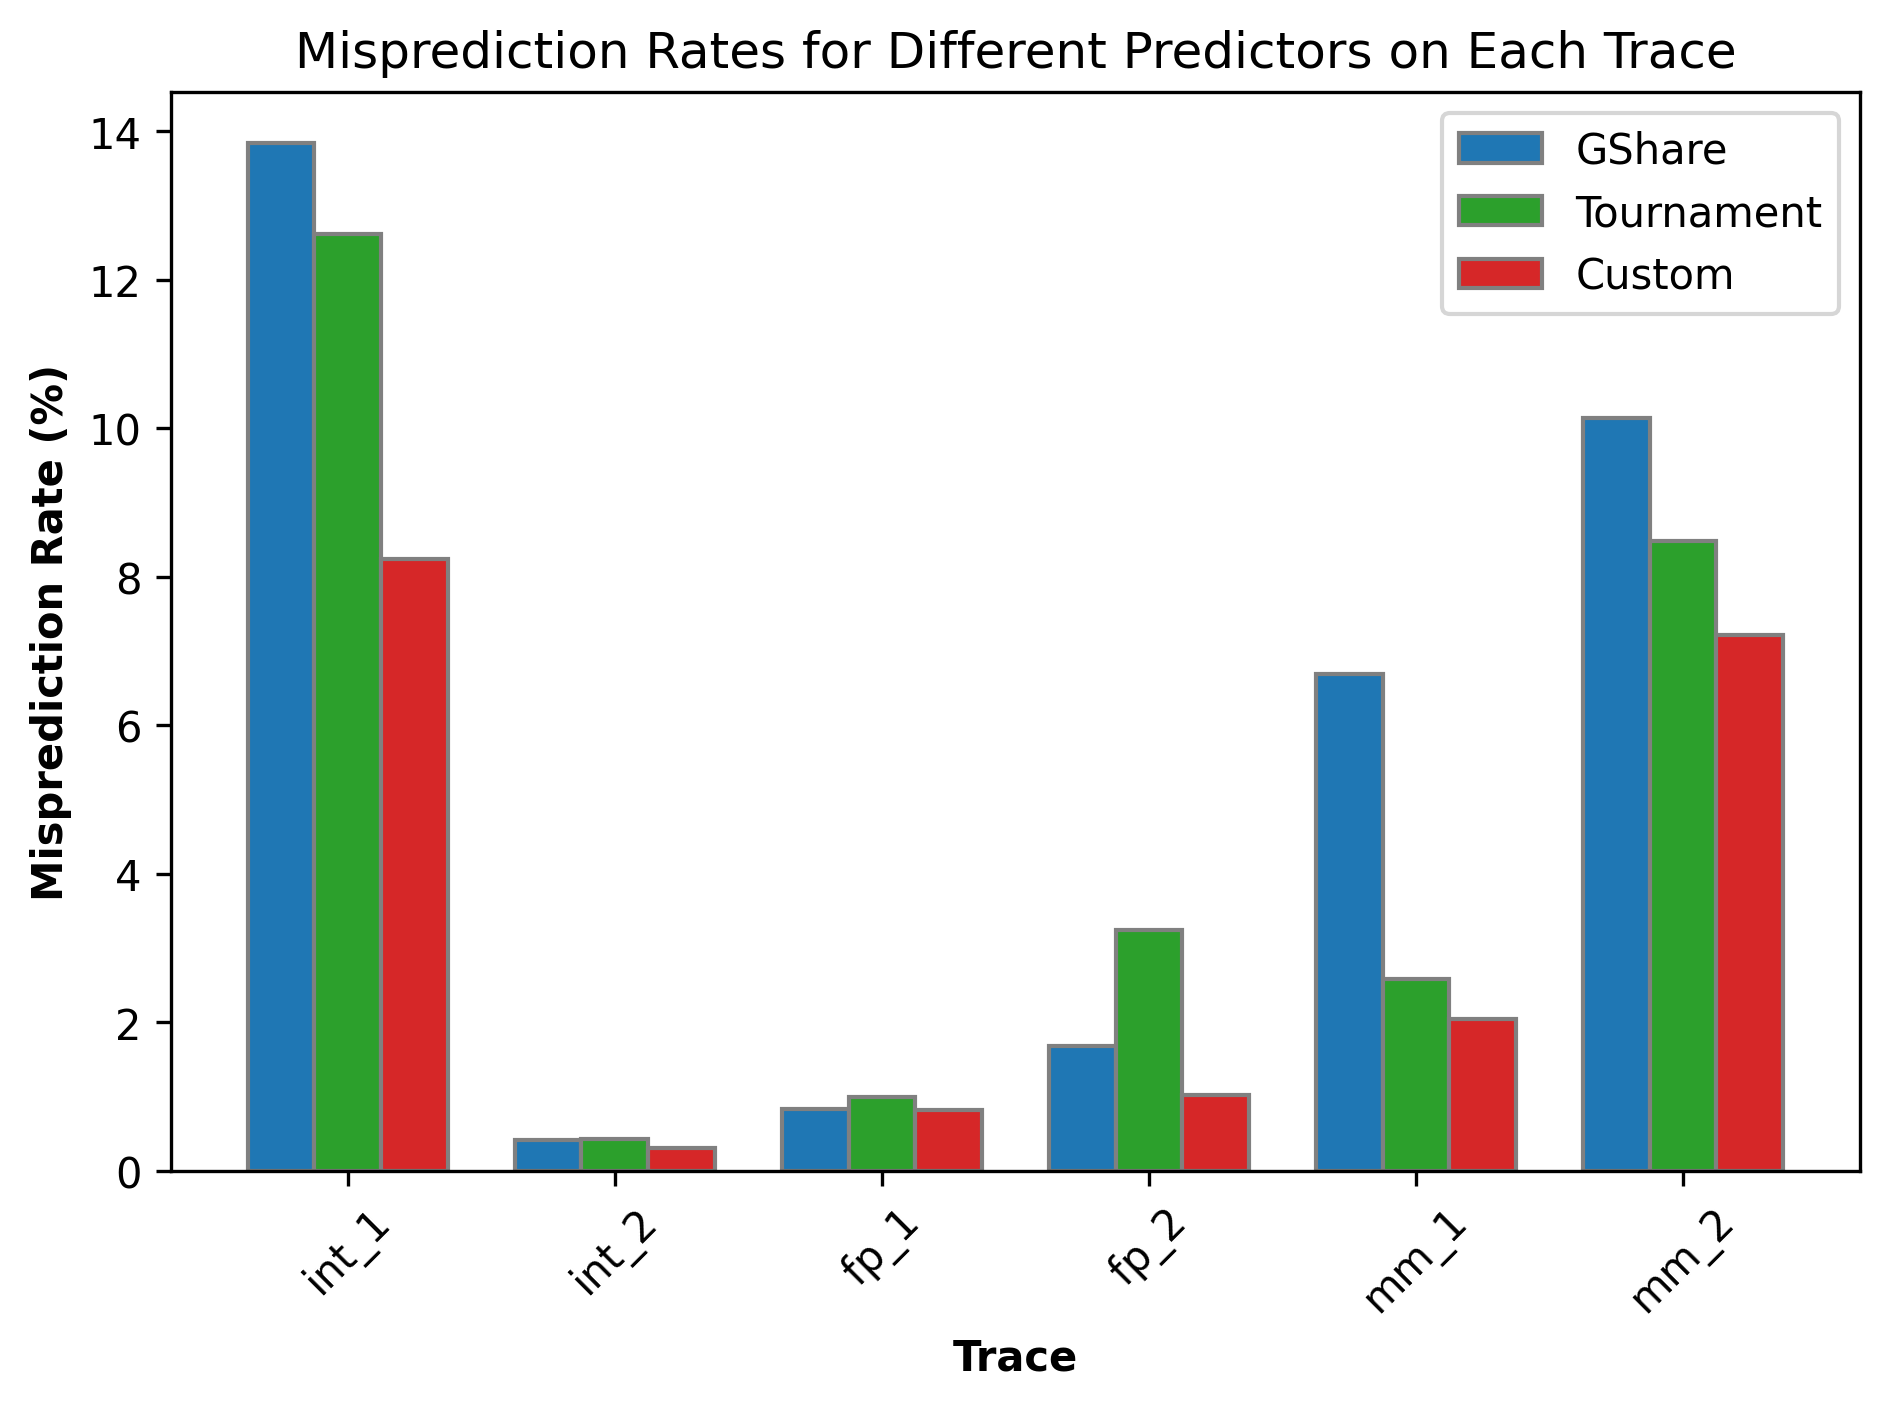

In [3]:
import numpy as np
bar_width = 0.25

r1 = np.arange(len(traces))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(dpi = 300)

colors = ['#1f77b4', '#2ca02c', '#d62728']
plt.bar(r1, gshare_rates, color=colors[0], width=bar_width, edgecolor='grey', label='GShare')
plt.bar(r2, tournament_rates, color=colors[1], width=bar_width, edgecolor='grey', label='Tournament')
plt.bar(r3, custom_rates, color=colors[2], width=bar_width, edgecolor='grey', label='Custom')


plt.xlabel('Trace', fontweight='bold')
plt.ylabel('Misprediction Rate (%)', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(traces))], traces)


plt.legend()
plt.title('Misprediction Rates for Different Predictors on Each Trace')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./imgs/resultsAll.png')
plt.show()

## Perceptron Hyper-parameter Optimization of $\theta$

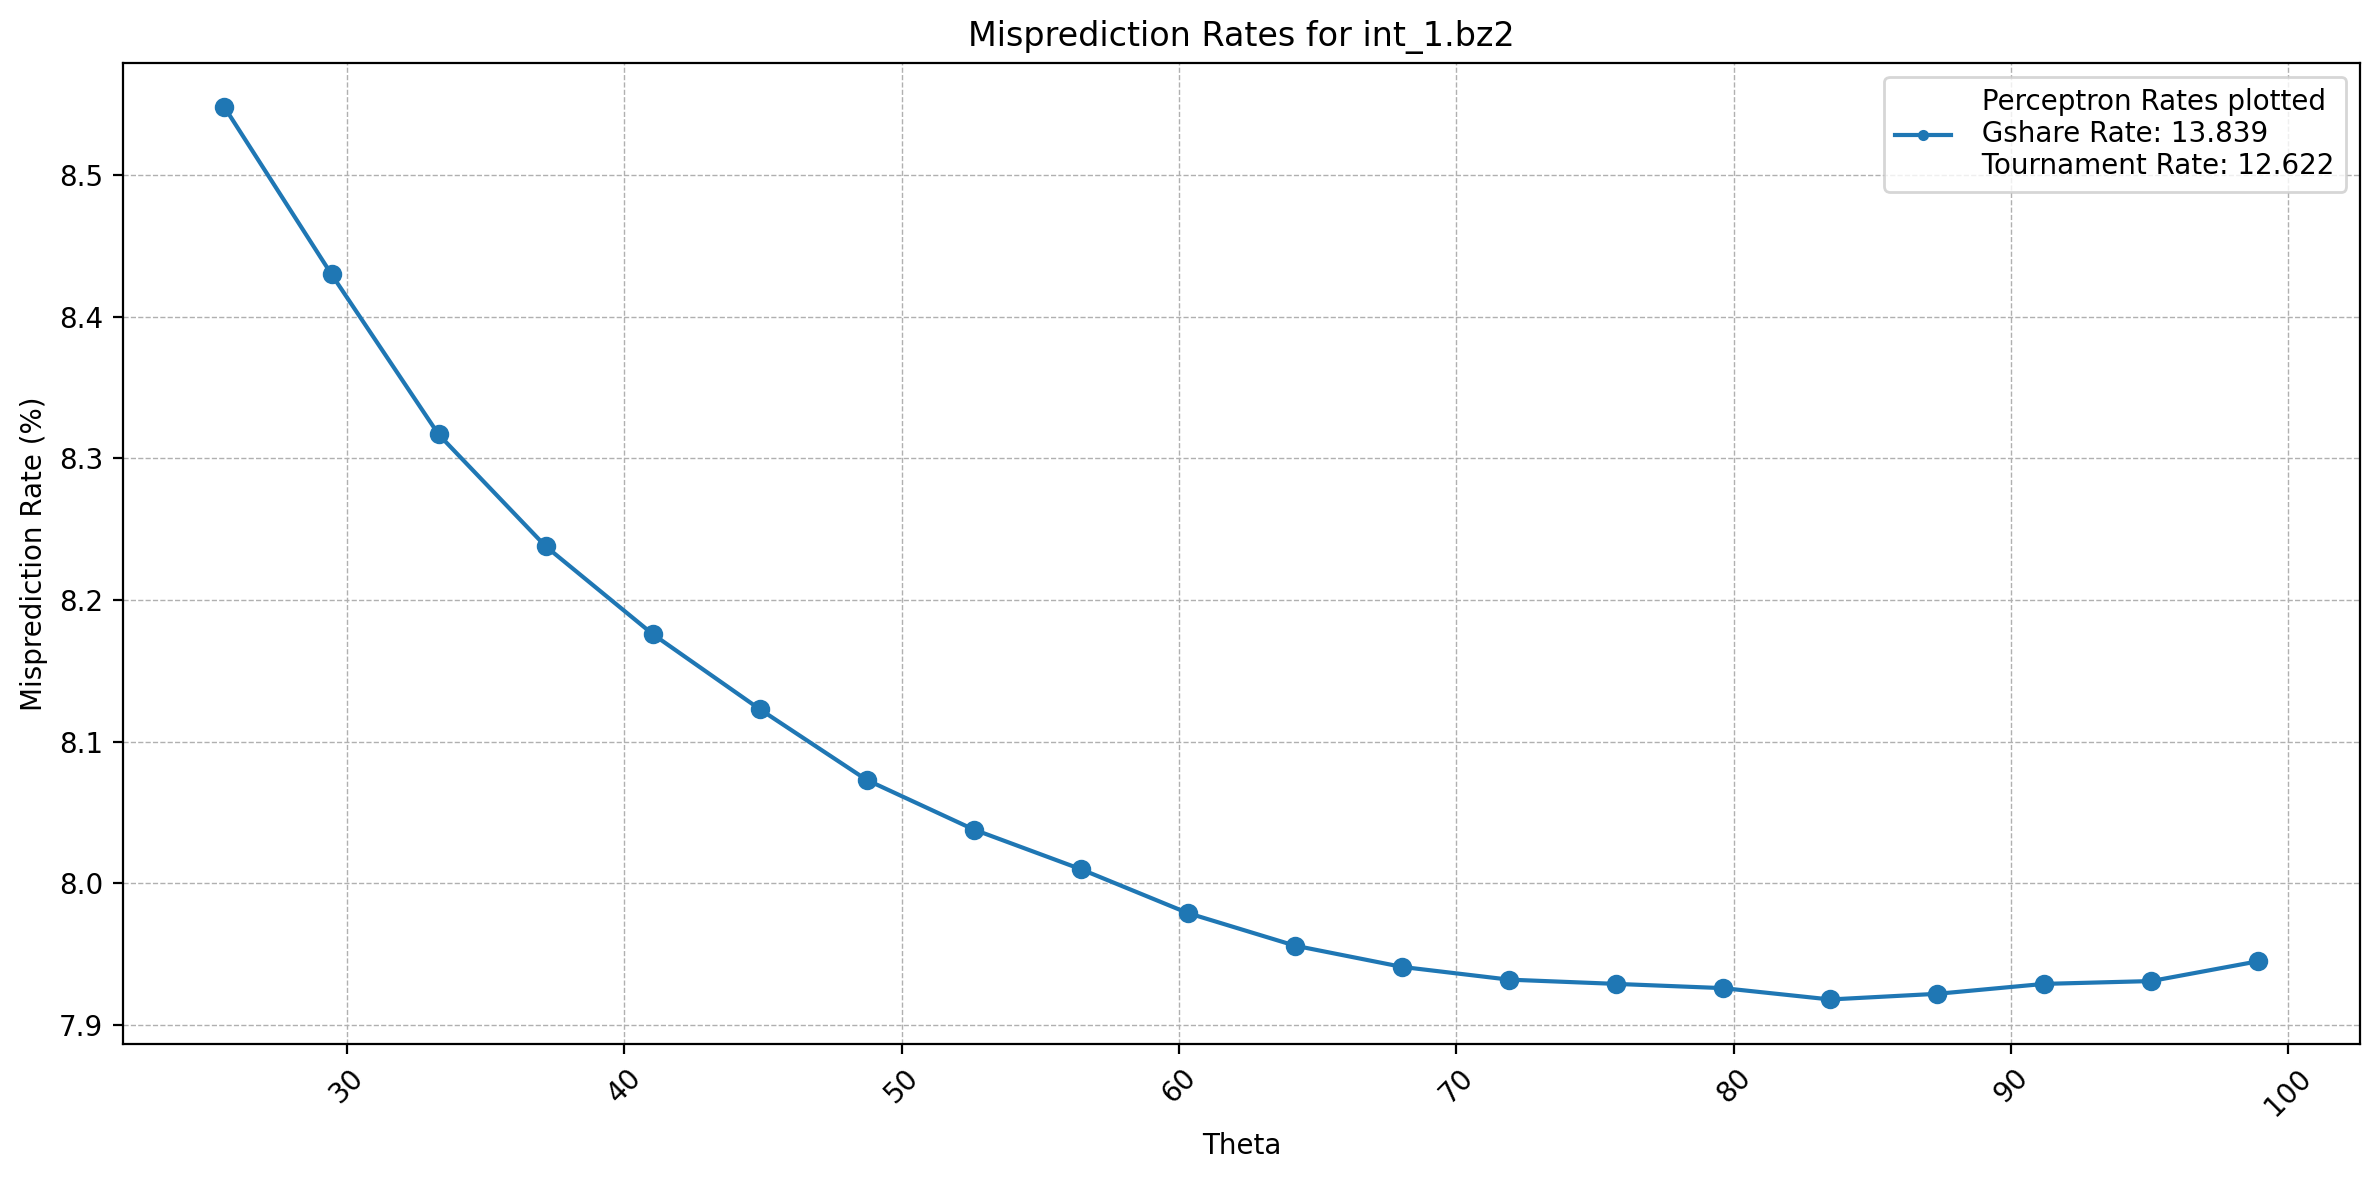

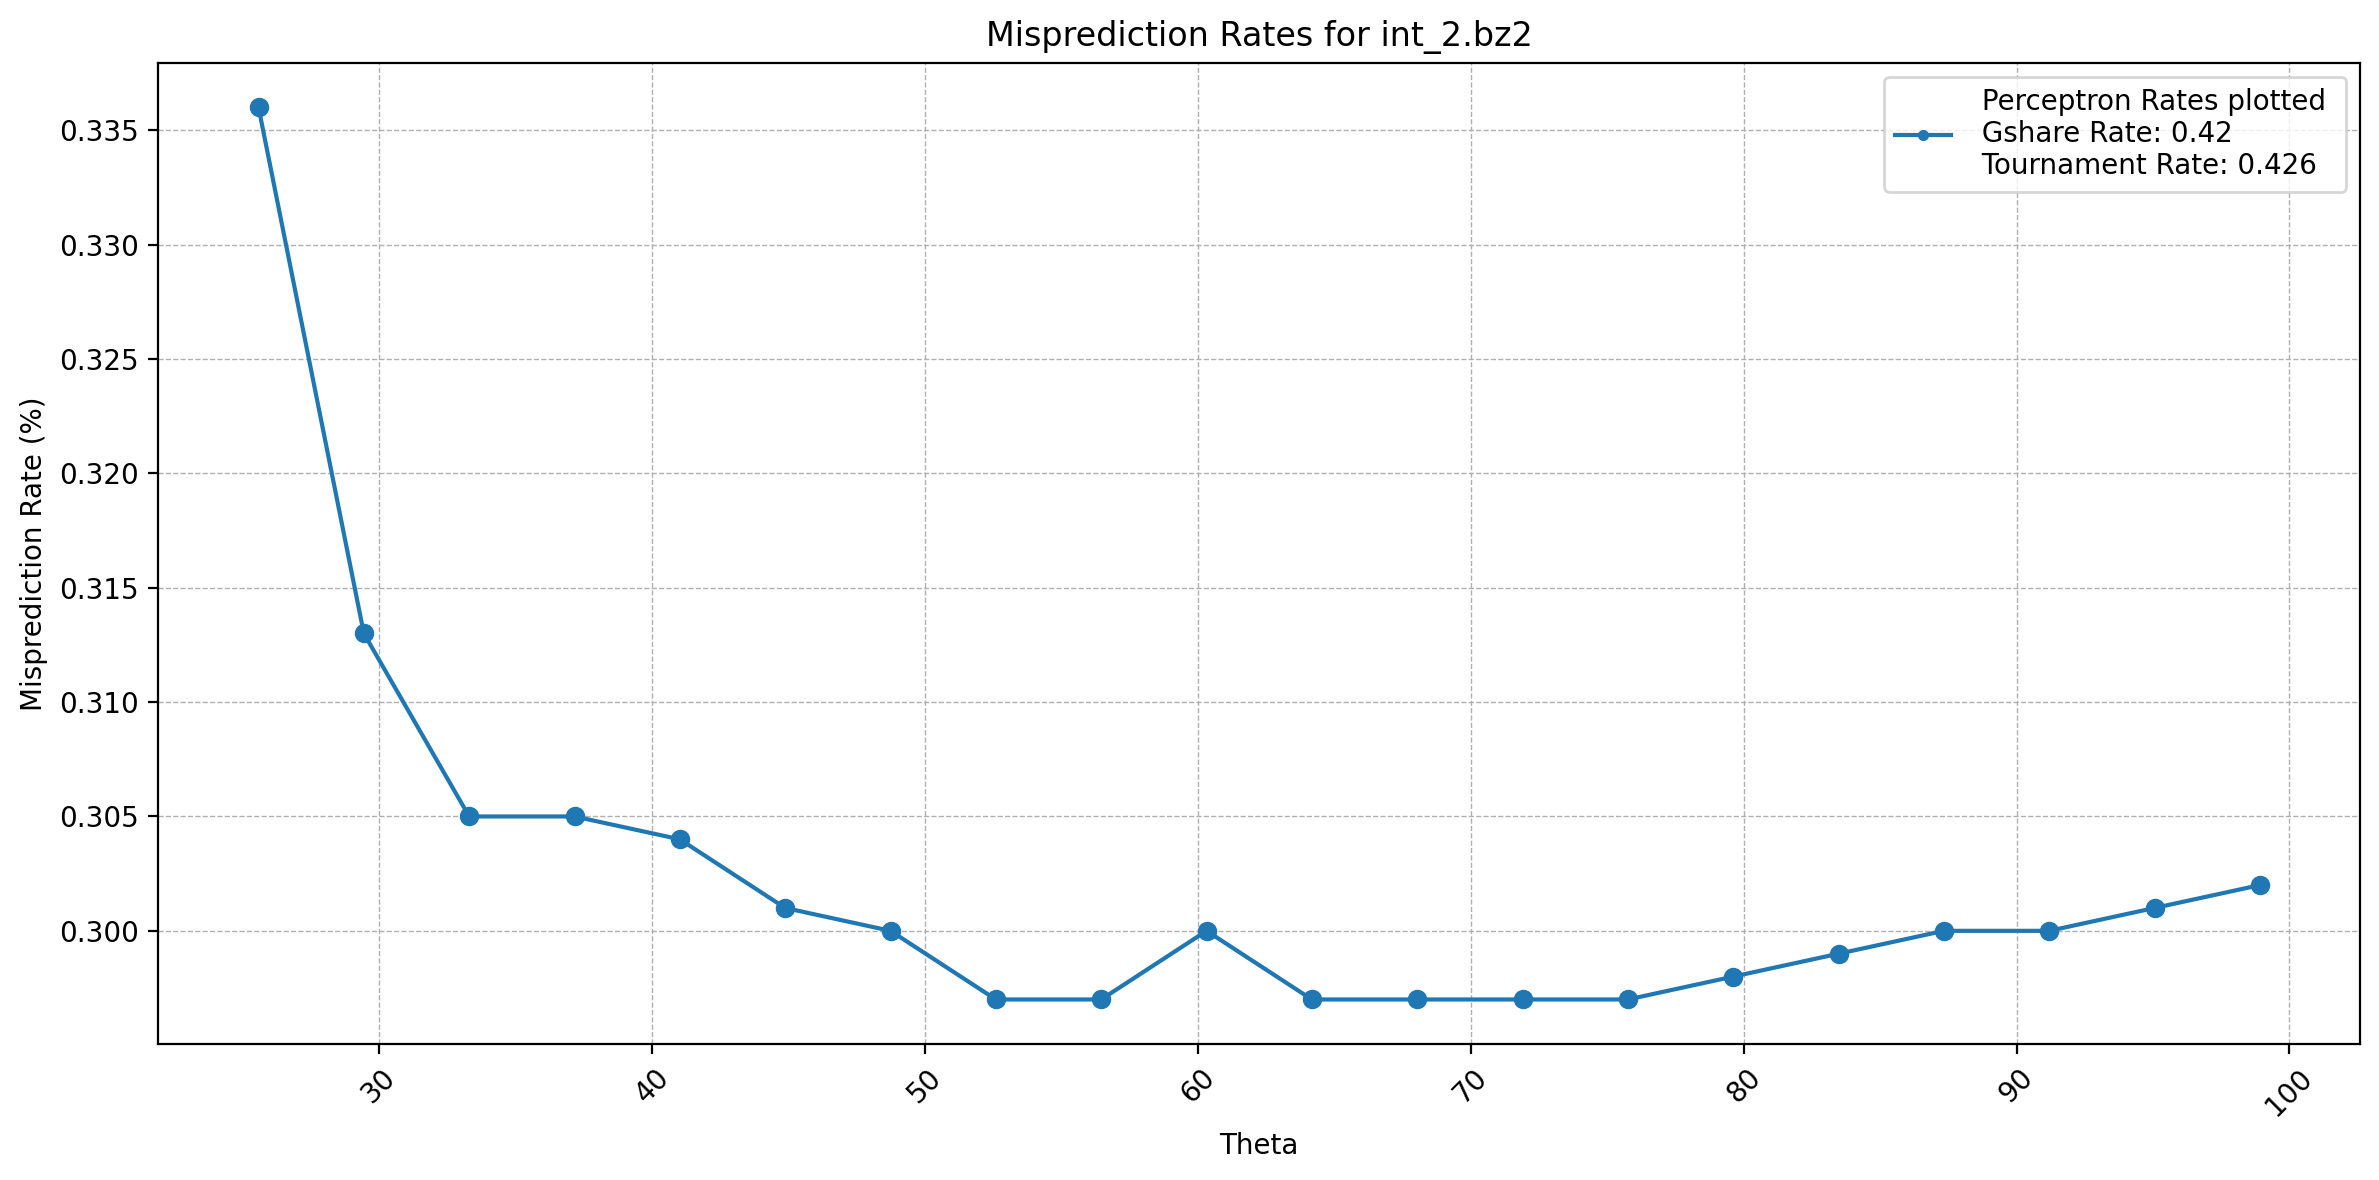

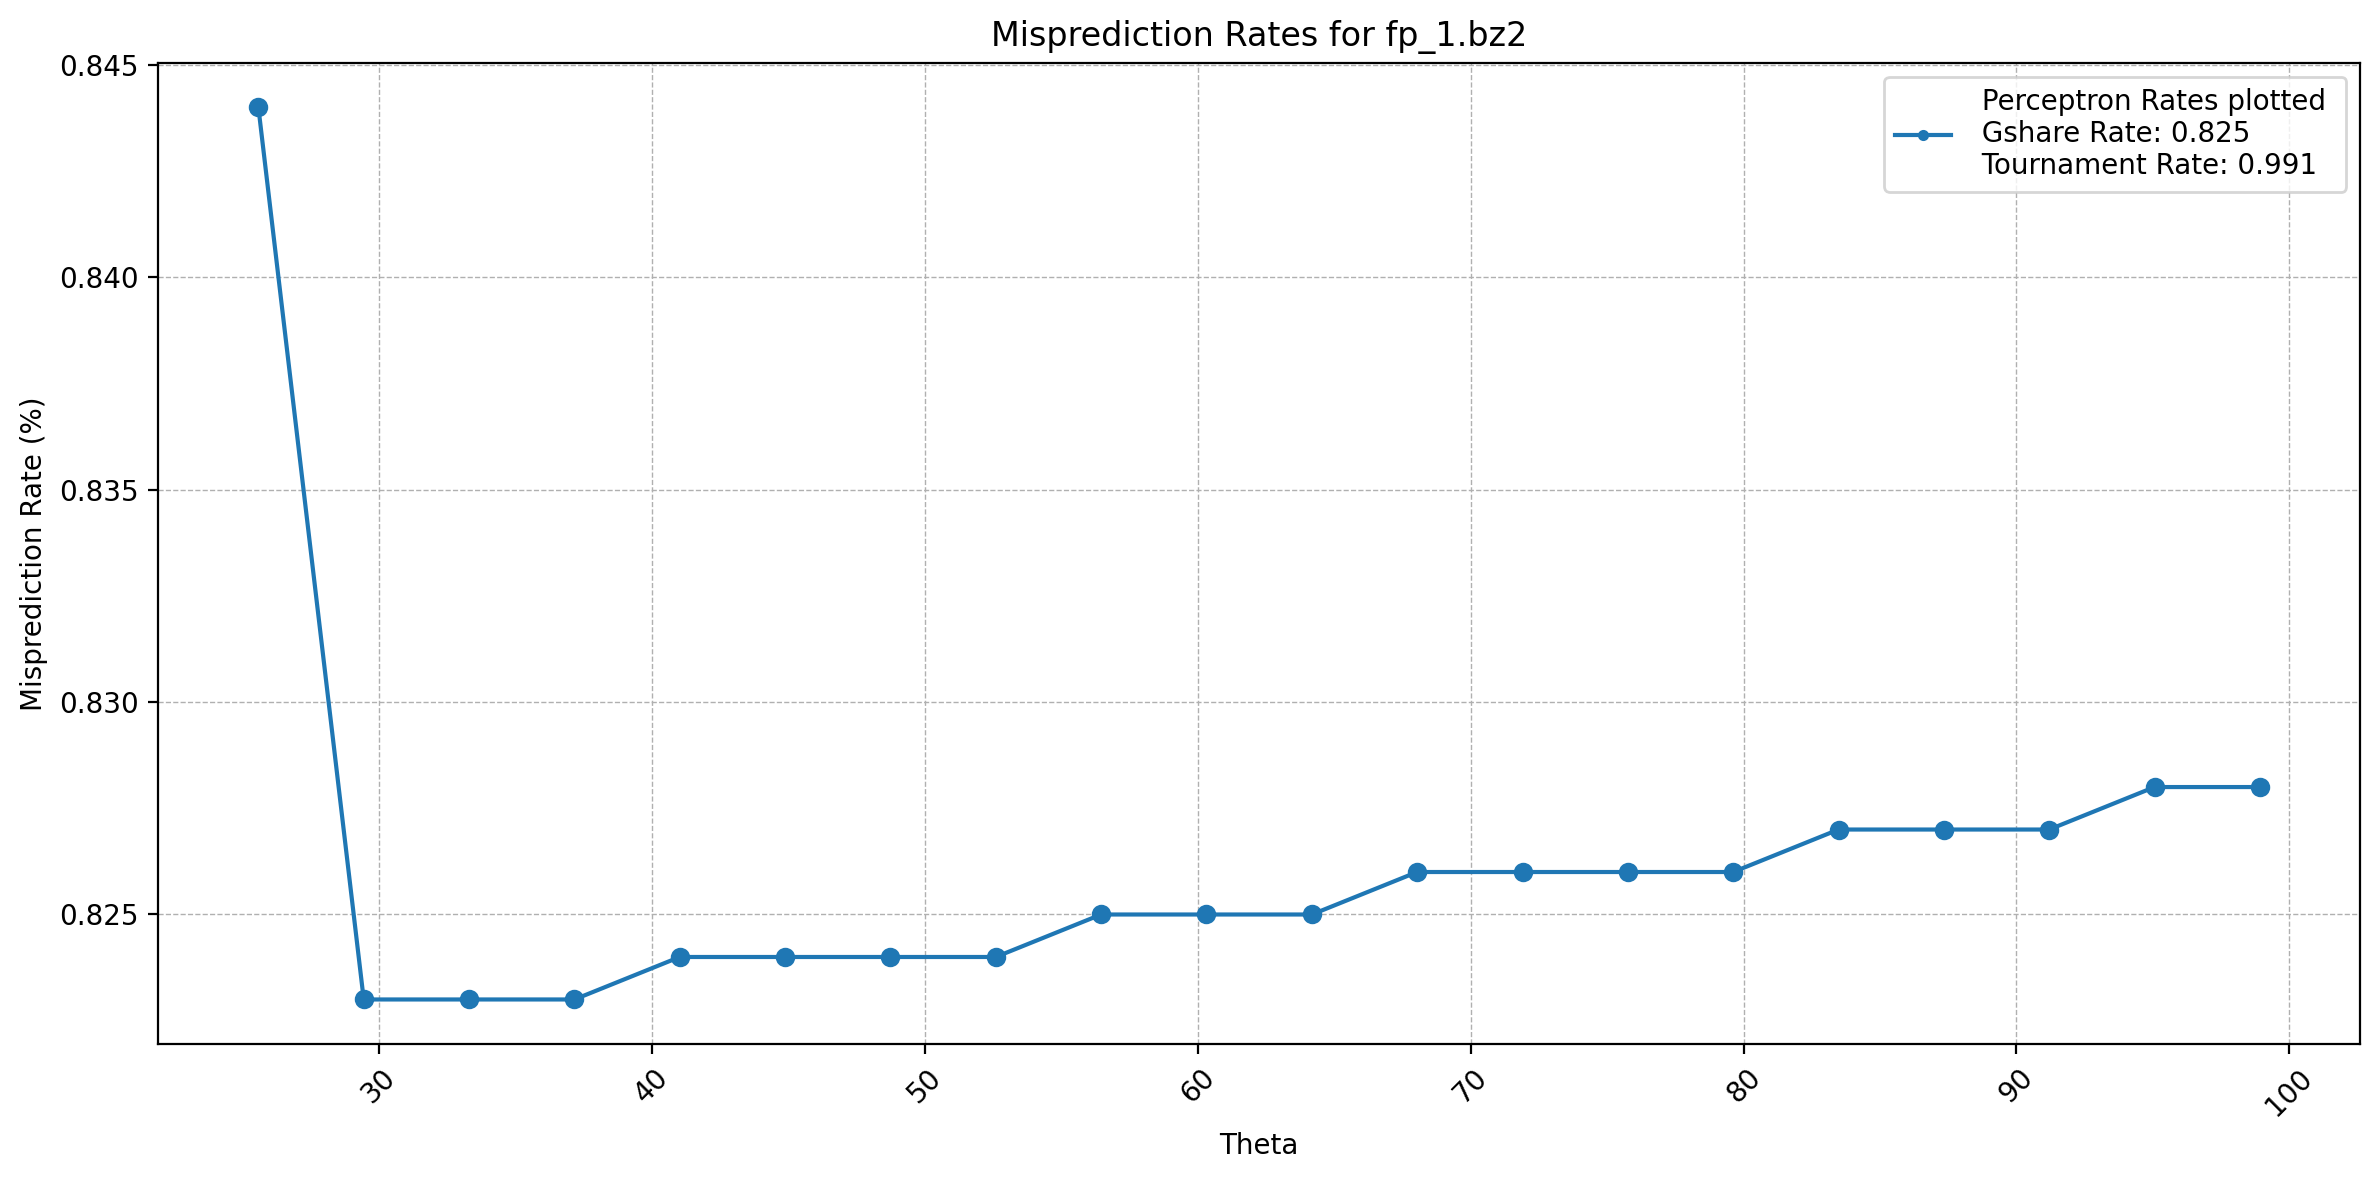

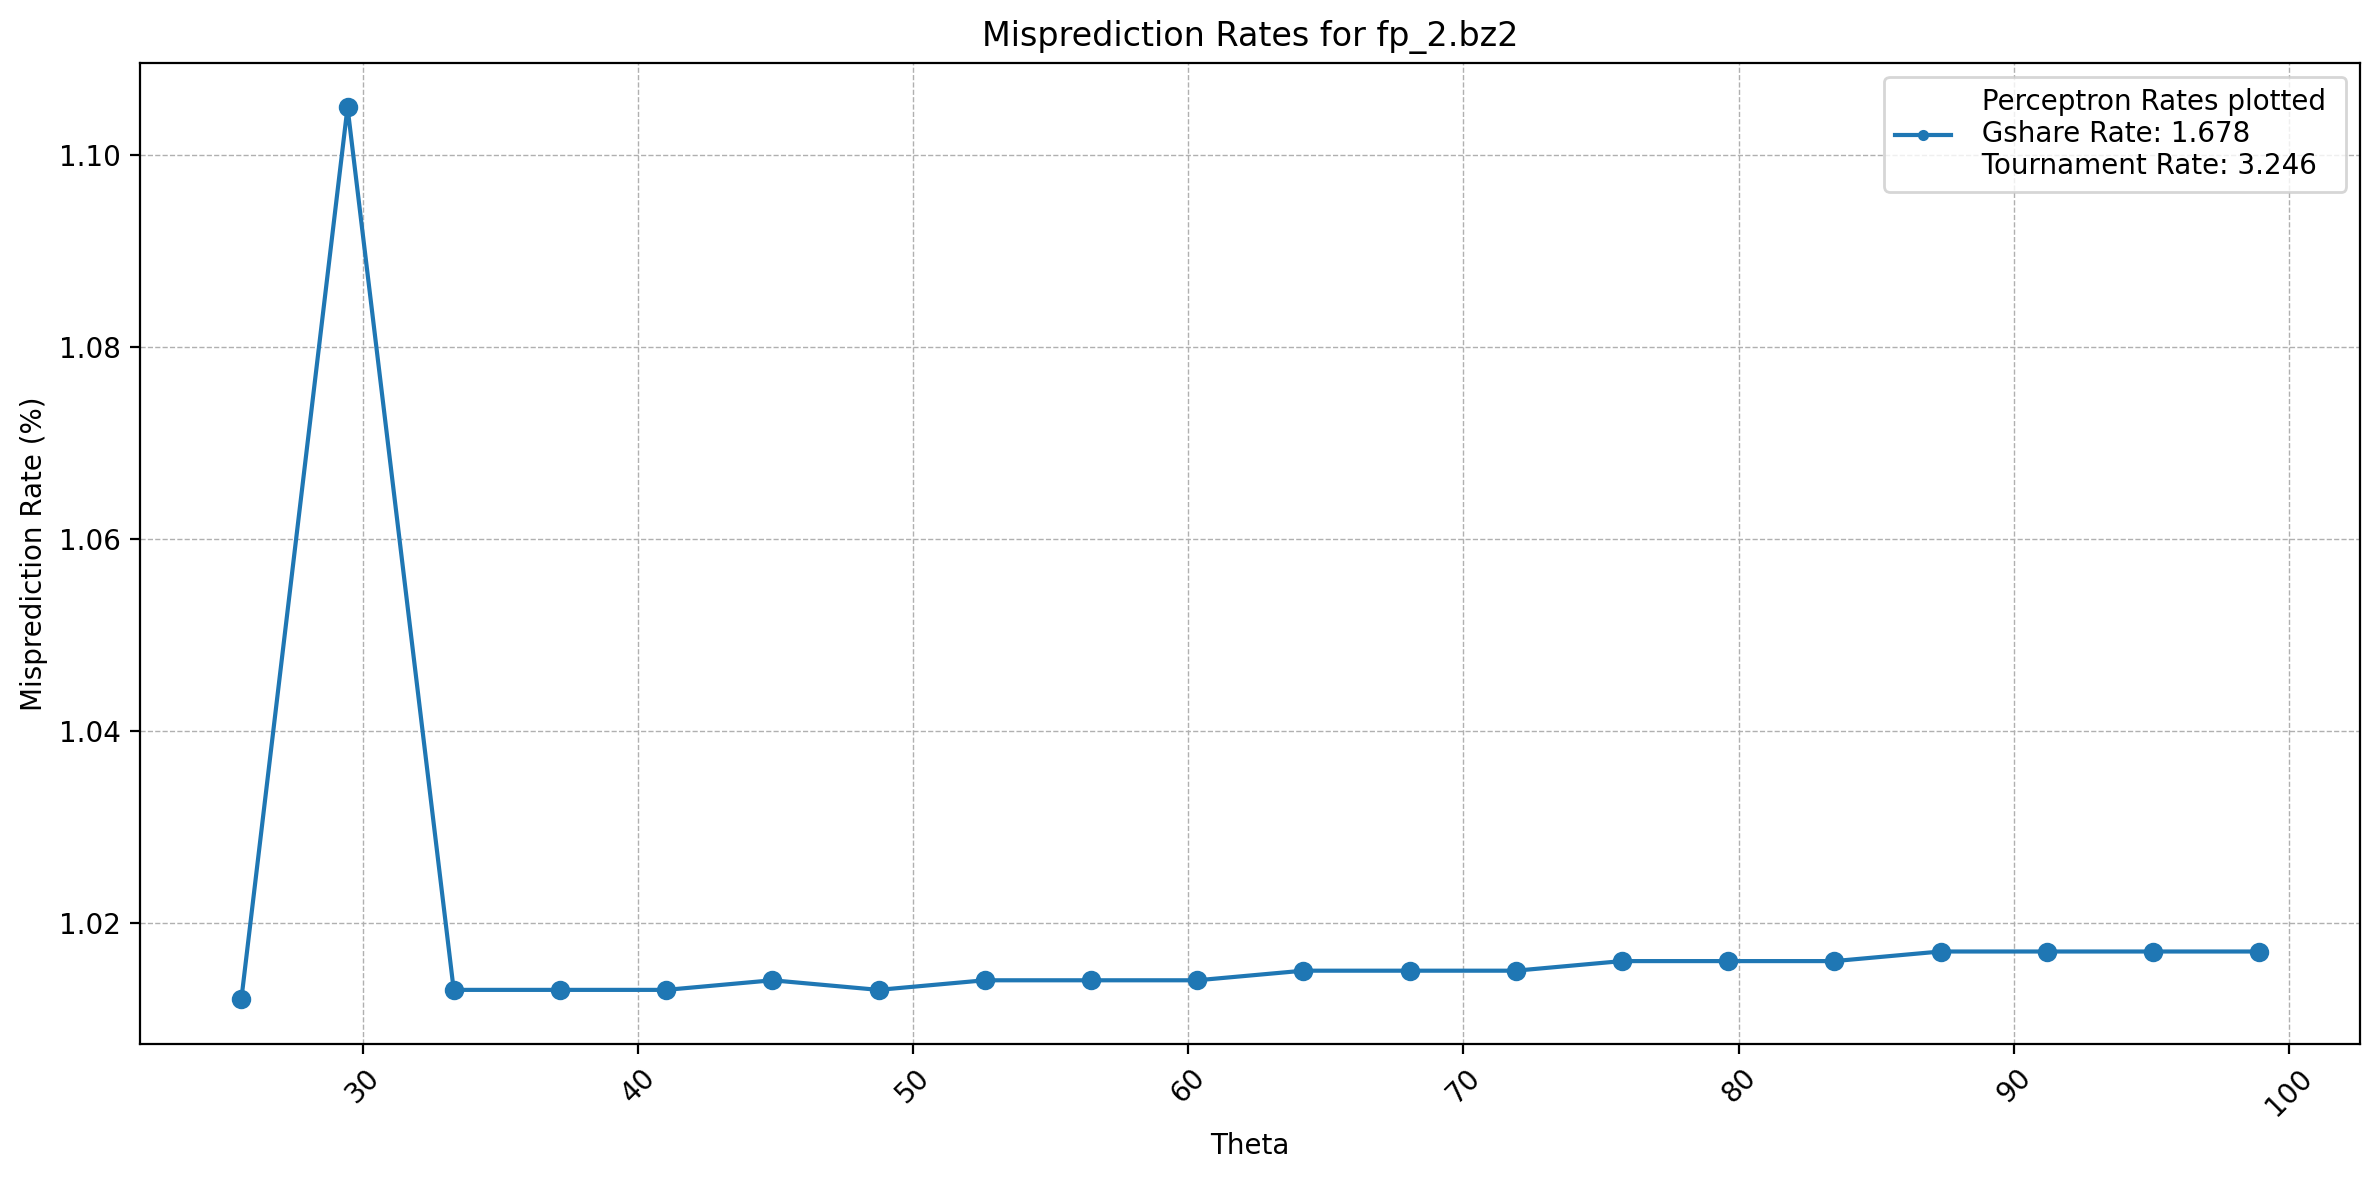

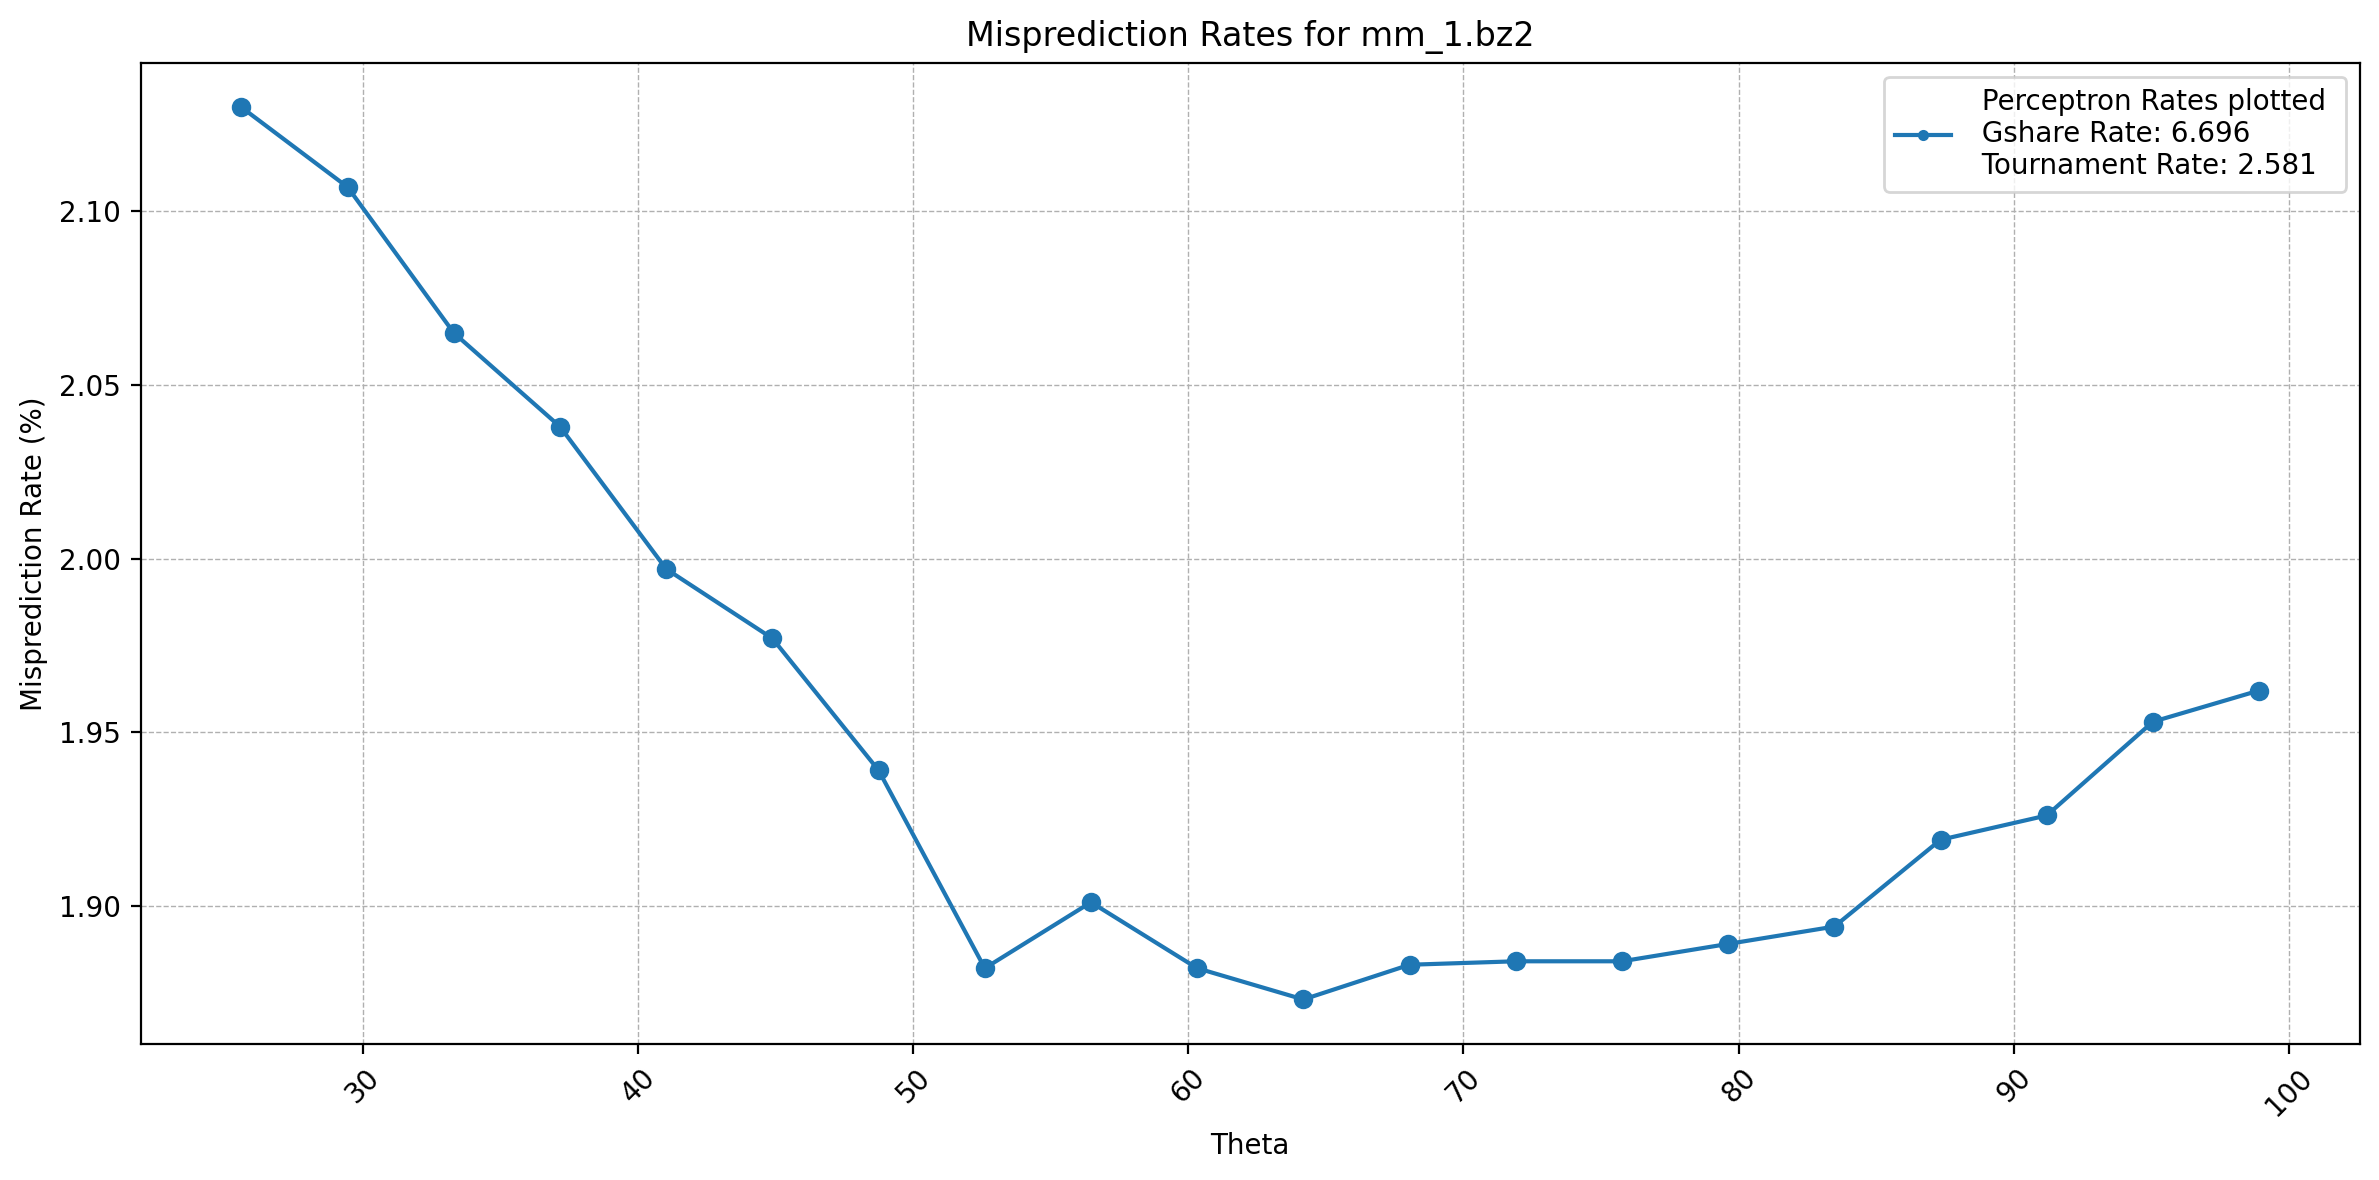

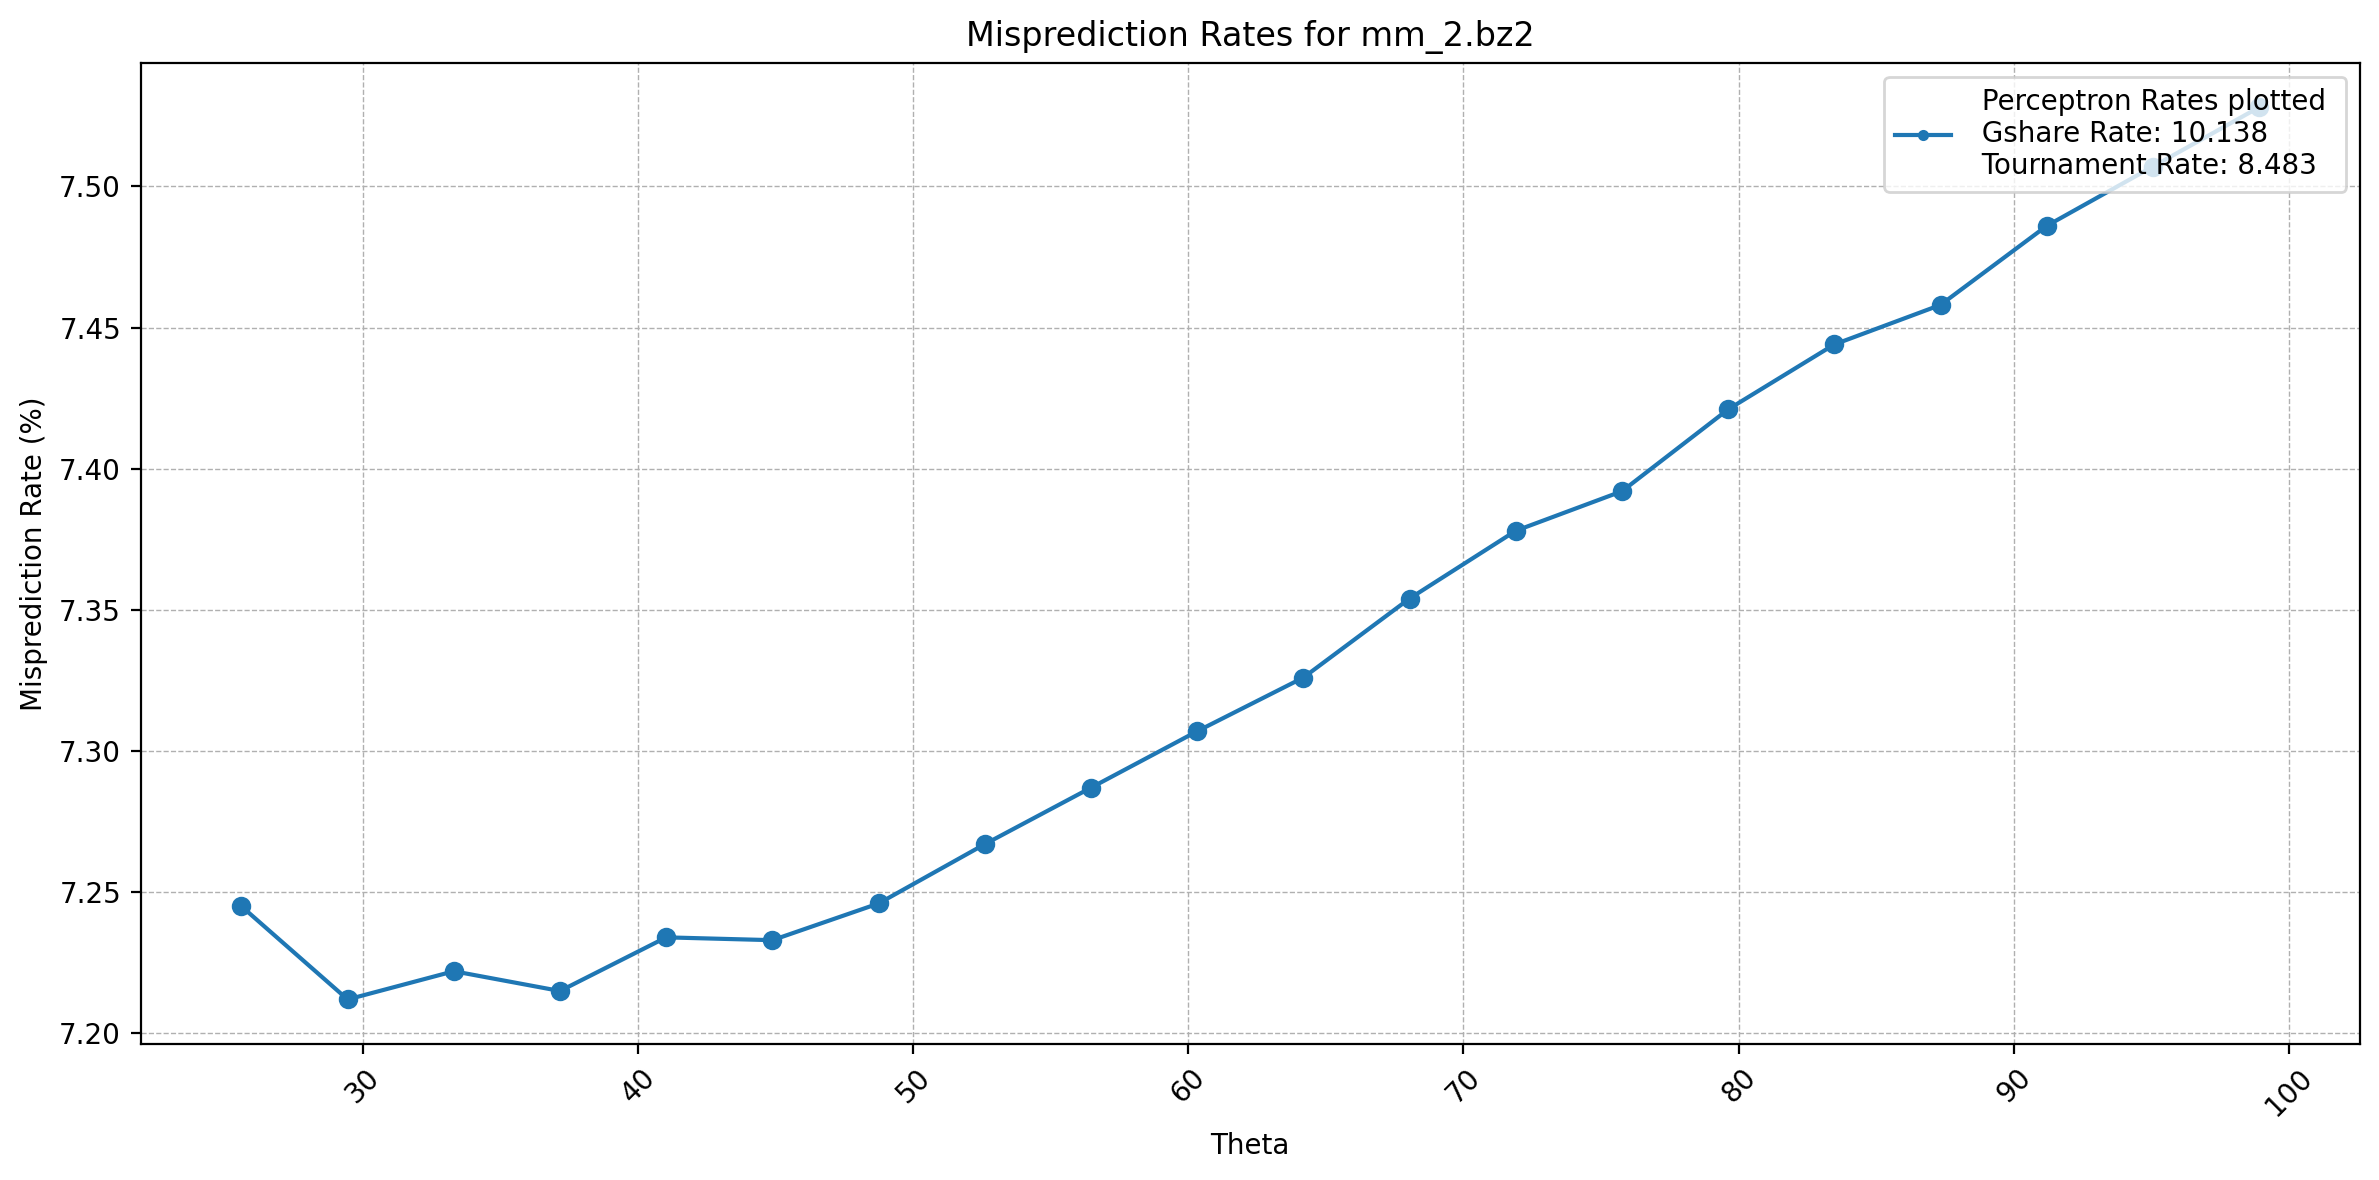

In [41]:
import matplotlib.pyplot as plt


with open("../perceptron_hpo.txt", "r") as file:
    data = file.readlines()


traces = {}
for line in data:
    trace, theta, misprediction_rate = line.strip().split(',')
    if trace not in traces:
        traces[trace] = {'theta': [], 'misprediction_rate': []}
    traces[trace]['theta'].append(float(theta))
    traces[trace]['misprediction_rate'].append(float(misprediction_rate))


for trace, values in traces.items():
    plt.figure(figsize=(12, 6), dpi = 200)
    plt.plot(values['theta'], values['misprediction_rate'], marker='o', linestyle='-', label='Perceptron')
    gshare_rate = gshare_rates[list(traces.keys()).index(trace)]
    tournament_rate = tournament_rates[list(traces.keys()).index(trace)]
    plt.legend([f' Perceptron Rates plotted \n Gshare Rate: {gshare_rate} \n Tournament Rate: {tournament_rate}'], loc='upper right', markerscale=0.5)
    plt.title(f'Misprediction Rates for {trace}')
    plt.xlabel('Theta')
    plt.ylabel('Misprediction Rate (%)')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("./imgs/hpo_"+trace[:-4])
    plt.show()

### Performance of Perceptron w.r.t GShare:13 Baseline for various $\theta$

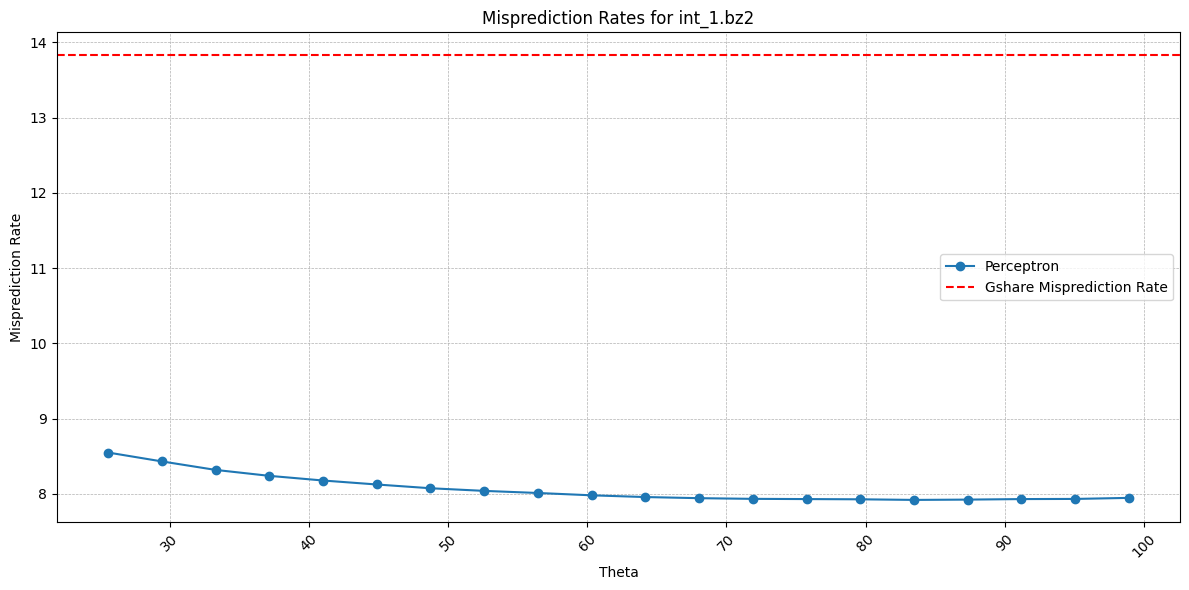

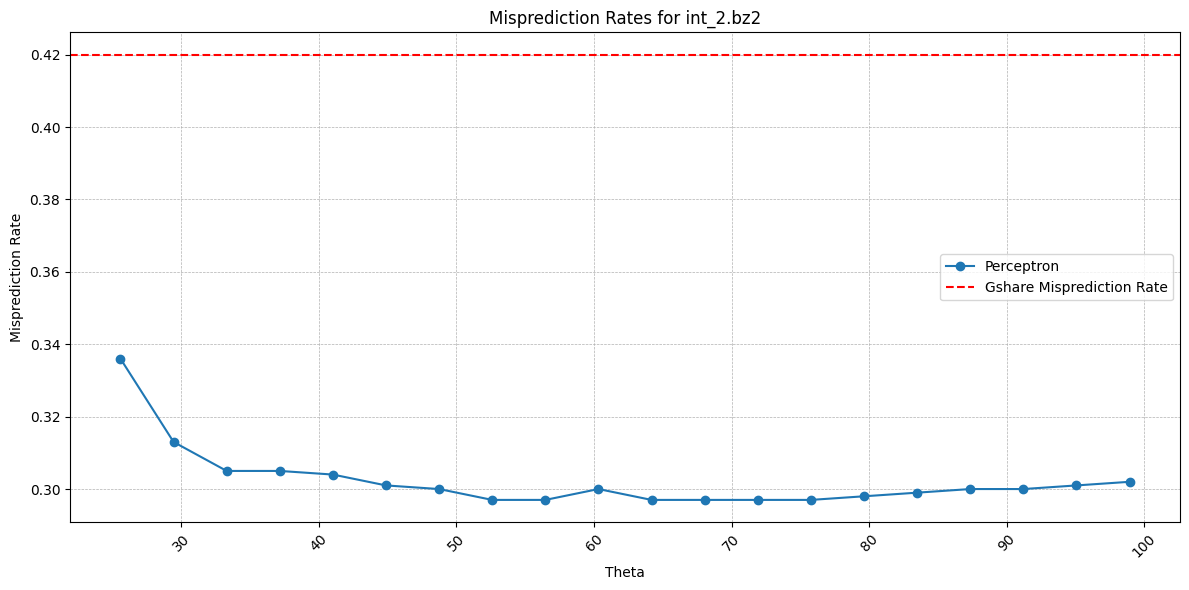

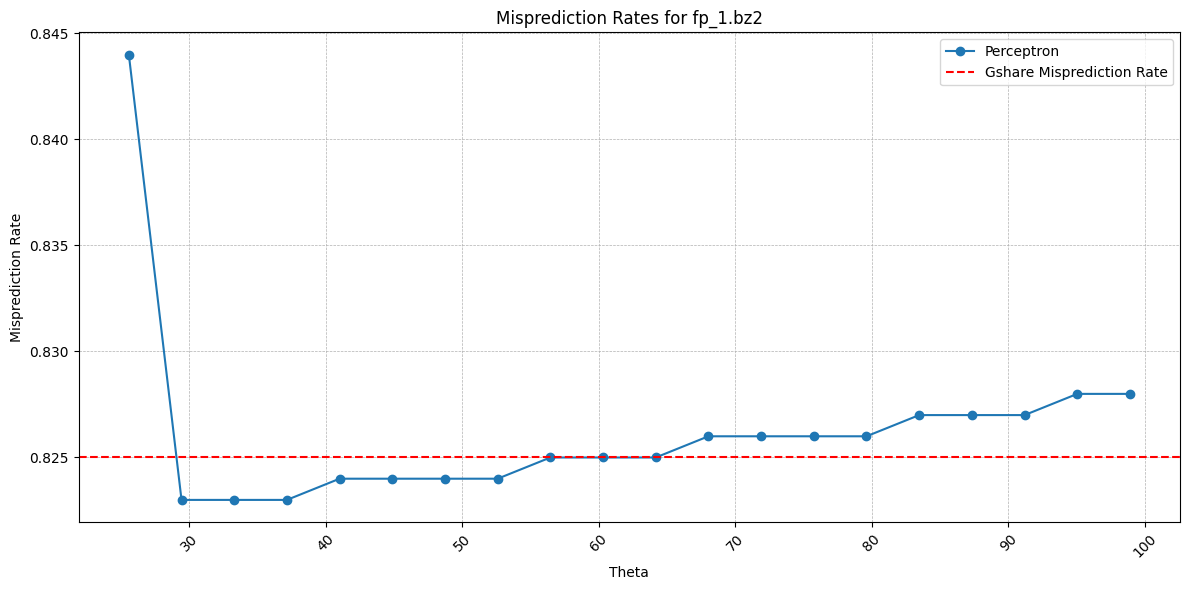

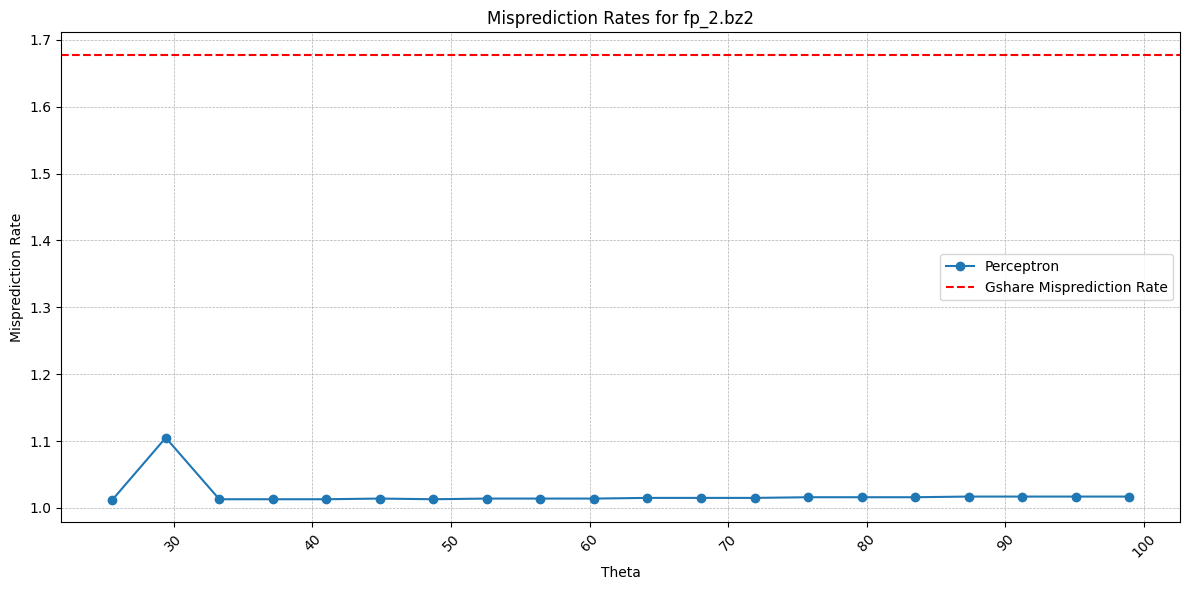

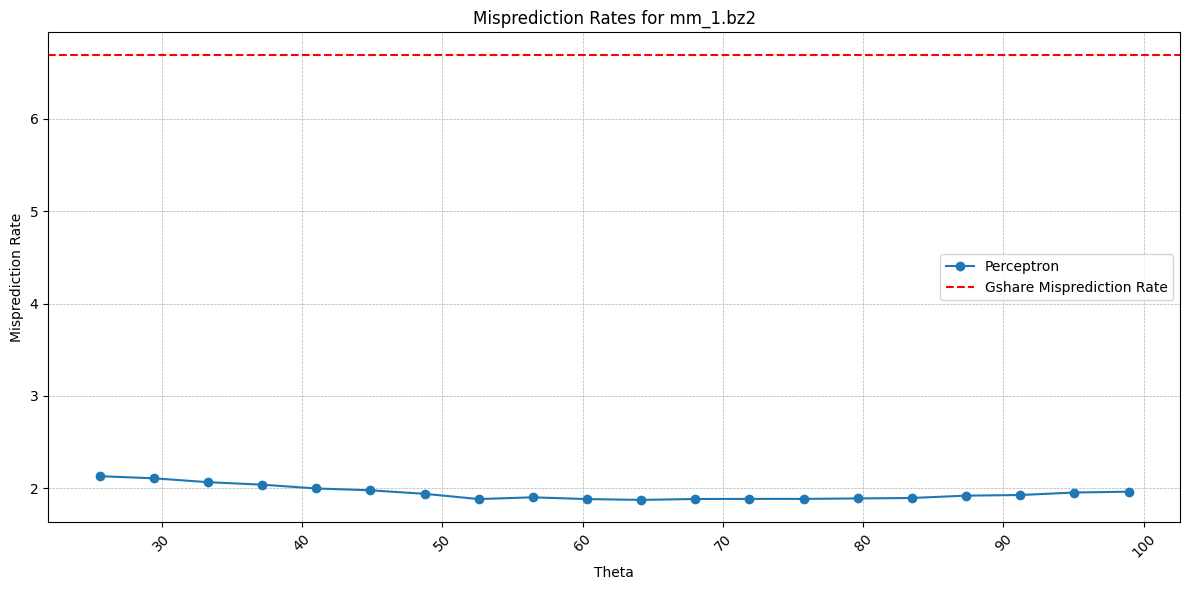

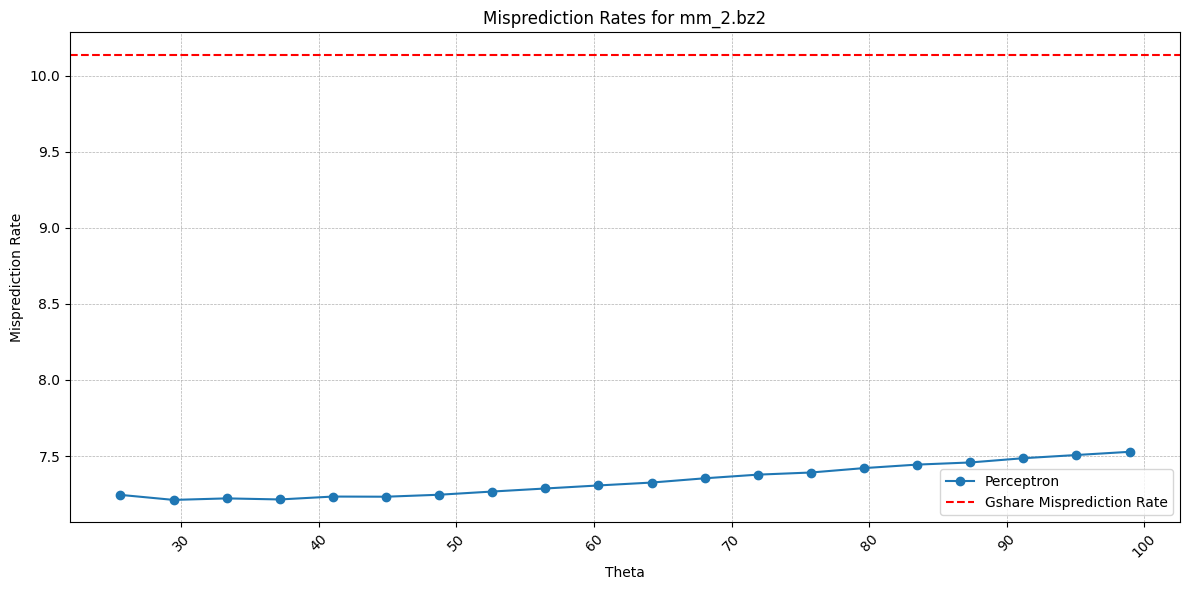

In [43]:
import matplotlib.pyplot as plt


with open("../perceptron_hpo.txt", "r") as file:
    data = file.readlines()


traces = {}
for line in data:
    trace, theta, misprediction_rate = line.strip().split(',')
    if trace not in traces:
        traces[trace] = {'theta': [], 'misprediction_rate': []}
    traces[trace]['theta'].append(float(theta))
    traces[trace]['misprediction_rate'].append(float(misprediction_rate))


for trace, values in traces.items():
    plt.figure(figsize=(12, 6))
    plt.plot(values['theta'], values['misprediction_rate'], marker='o', linestyle='-', label='Perceptron')
    gshare_rate = gshare_rates[list(traces.keys()).index(trace)]
    tournament_rate = tournament_rates[list(traces.keys()).index(trace)]
    plt.axhline(y=gshare_rate, color='r', linestyle='--', label='Gshare Misprediction Rate')
    plt.title(f'Misprediction Rates for {trace}')
    plt.xlabel('Theta')
    plt.ylabel('Misprediction Rate')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Gshare performance for various #gHistoryBits

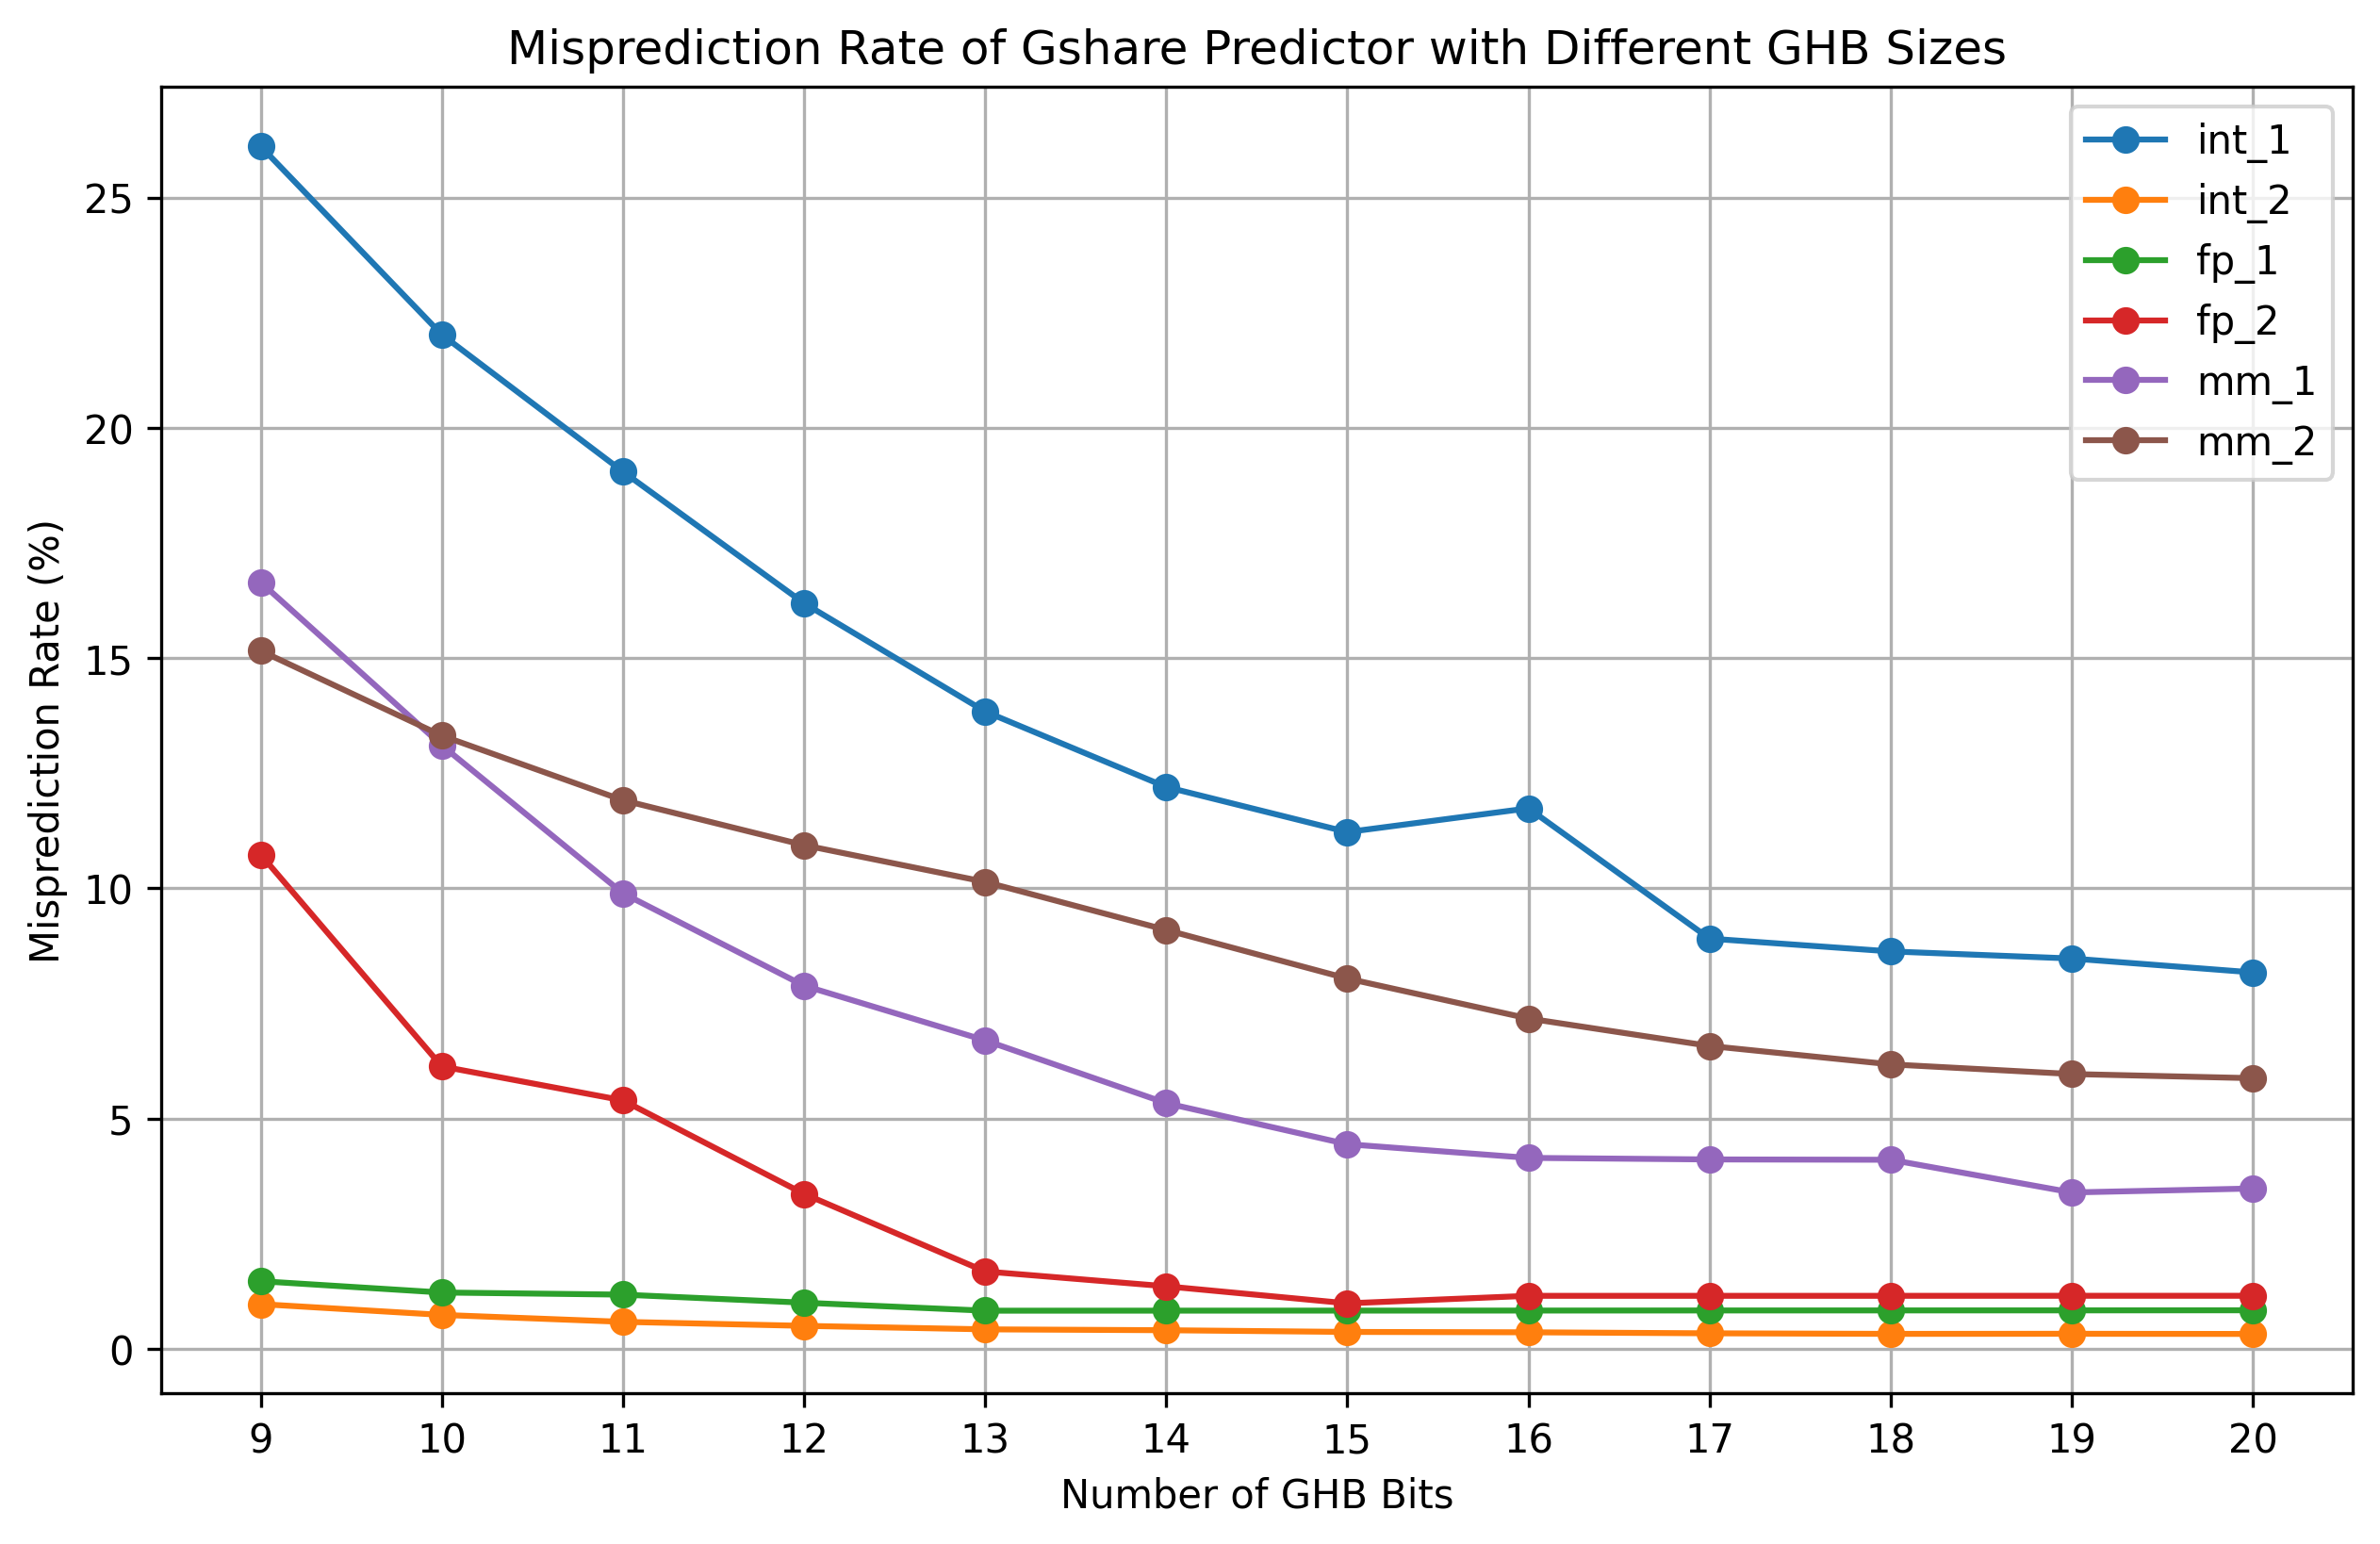

In [83]:
import matplotlib.pyplot as plt

file_path = "../gshare_results.txt"

misprediction_rates = {}

with open(file_path, 'r') as file:
    lines = file.readlines()
    trace = ""
    ghb_bits = 0

    for line in lines:
        if '.bz2:' in line:
            trace = line.strip().replace('.bz2:', '')
            continue

        if line.startswith("GHB"):
            ghb_bits = int(line.split(':')[1].strip())
            continue

        if line.startswith("Misprediction Rate"):
            misprediction_rate = float(line.split(':')[1].strip())

            if trace not in misprediction_rates:
                misprediction_rates[trace] = {}

            misprediction_rates[trace][ghb_bits] = misprediction_rate

plt.figure(figsize=(10, 6), dpi = 300)
for trace, data in misprediction_rates.items():
    ghb_bits = list(data.keys())
    misprediction_rate = list(data.values())
    plt.plot(ghb_bits, misprediction_rate, marker='o', label=trace)

plt.xlabel('Number of GHB Bits')
plt.ylabel('Misprediction Rate (%)')
plt.title('Misprediction Rate of Gshare Predictor with Different GHB Sizes')
plt.legend()
plt.grid(True)
plt.xticks(range(min(ghb_bits), max(ghb_bits)+1))

plt.savefig("./imgs/gshare.png")
plt.show()


## Tournament performance w.r.t various (#gHistoryBits:#lHistoryBits:#pcIndexBits) configurations

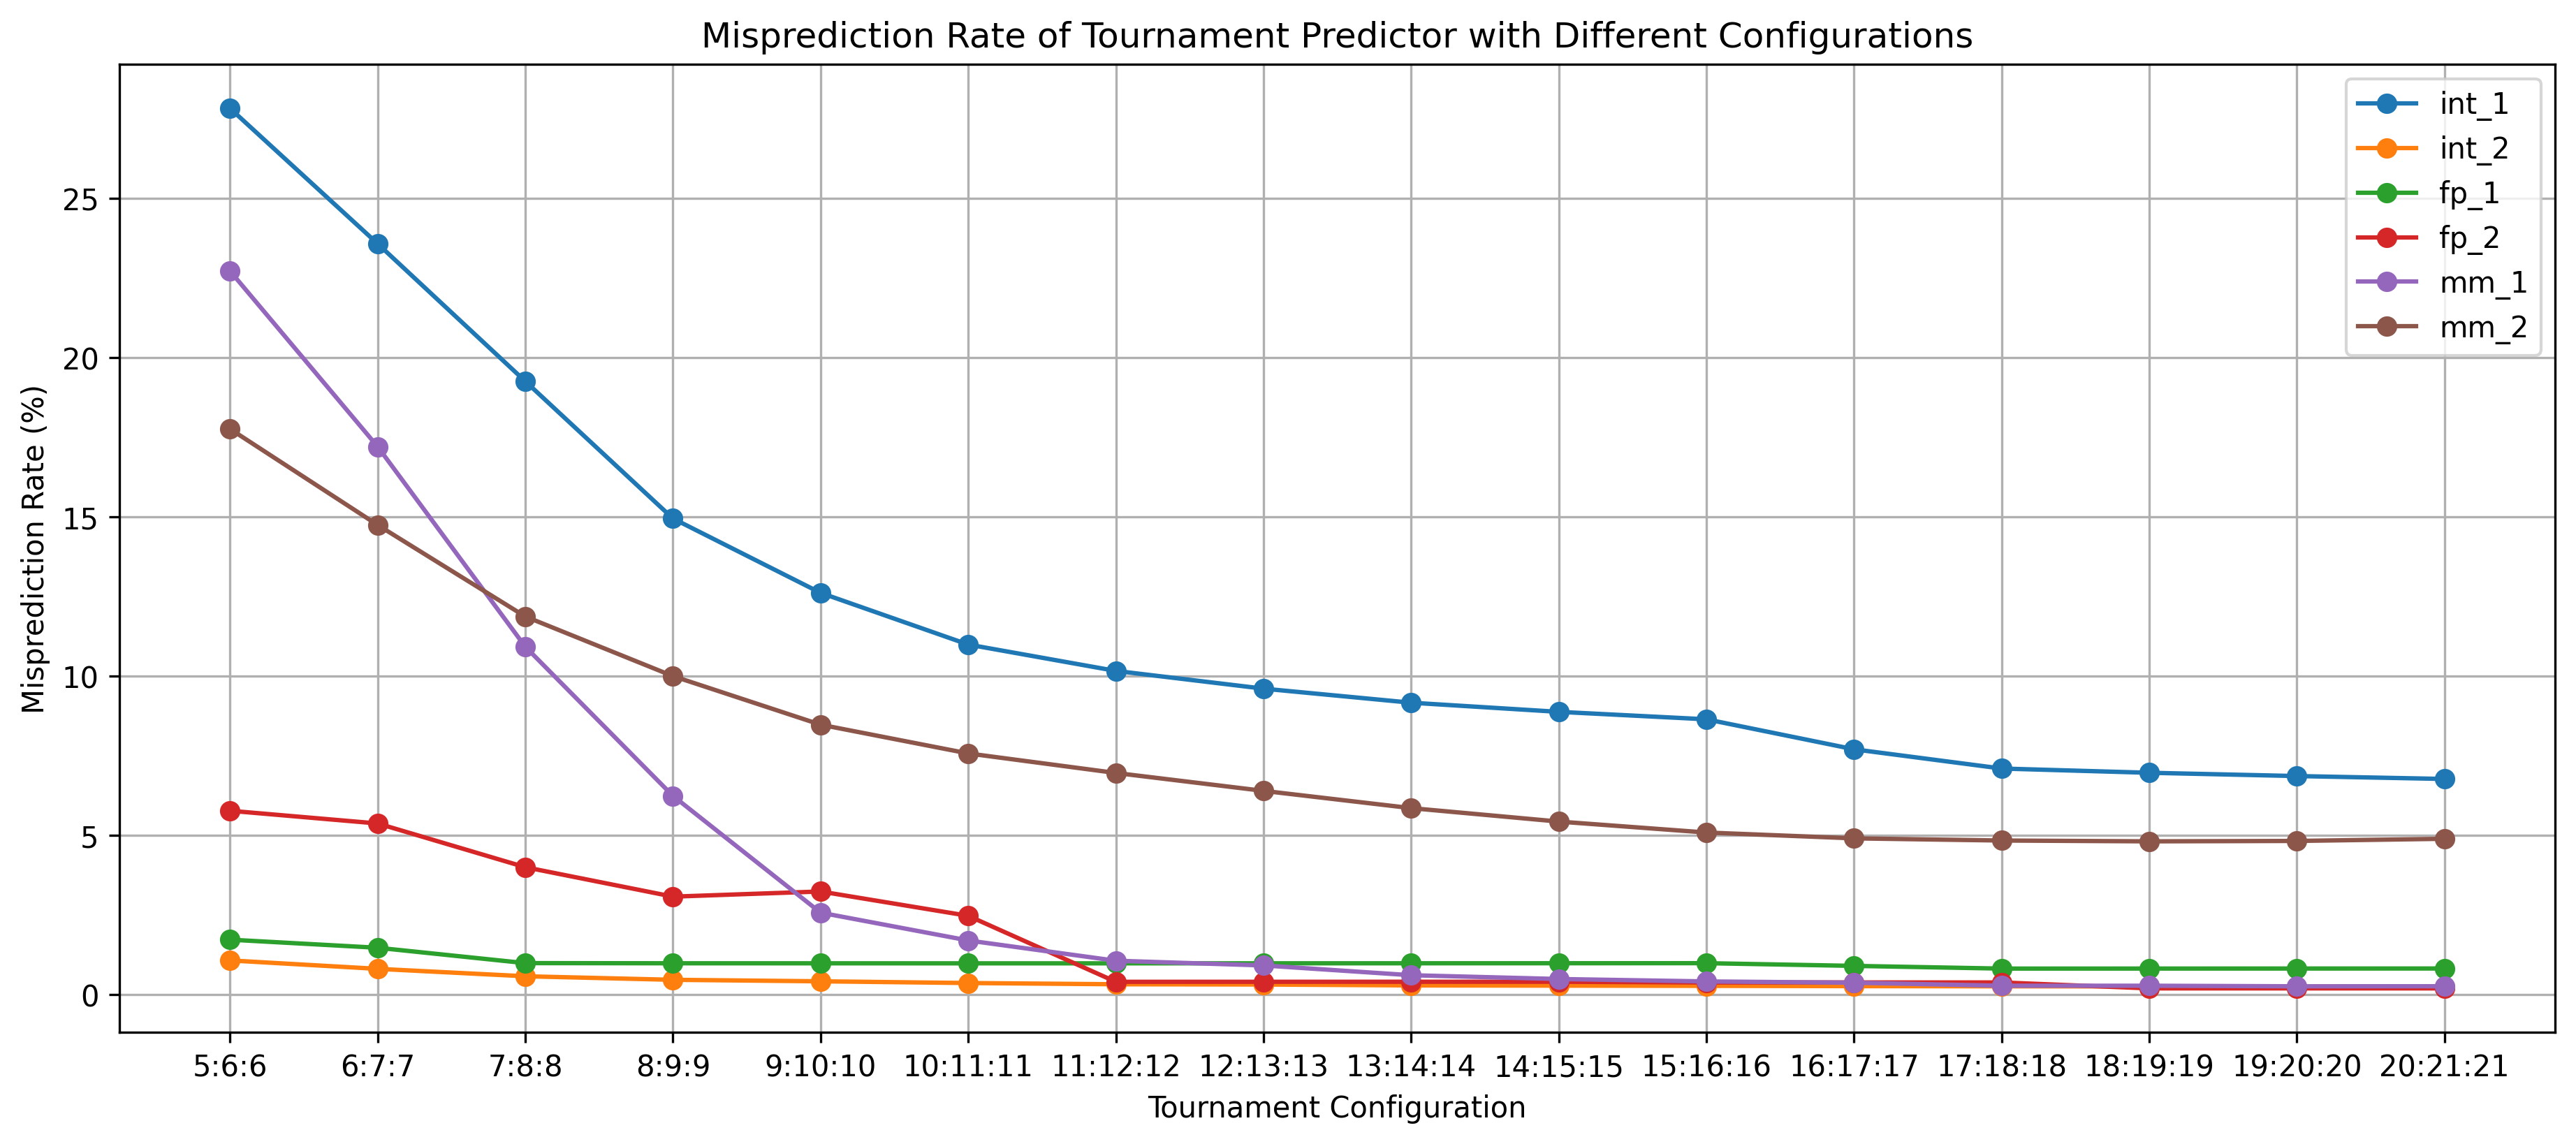

In [82]:
import matplotlib.pyplot as plt

tournament_file_path = "../tournament_results.txt"

tournament_misprediction_rates = {}

with open(tournament_file_path, 'r') as file:
    lines = file.readlines()
    trace = ""
    tournament_config = ""
    tournament_name = ""

    for line in lines:
        if '.bz2:' in line:
            trace = line.strip().replace('.bz2:', '')
            continue

        if line.startswith("Tournament"):
            tournament_name = line.split(':')[0].strip()
            tournament_config = line.split('_')[1].strip()[:-1]
            continue

        if line.startswith("Misprediction Rate"):
            misprediction_rate = float(line.split(':')[1].strip())

            if trace not in tournament_misprediction_rates:
                tournament_misprediction_rates[trace] = {}

            tournament_misprediction_rates[trace][tournament_config] = misprediction_rate

plt.figure(figsize=(15, 6), dpi = 300)
for trace, data in tournament_misprediction_rates.items():
    tournament_configs = [config for config in data.keys()]
    misprediction_rates = [data[config] for config in tournament_configs]
    plt.plot(tournament_configs, misprediction_rates, marker='o', label=trace)

plt.xlabel('Tournament Configuration')
plt.ylabel('Misprediction Rate (%)')
plt.title('Misprediction Rate of Tournament Predictor with Different Configurations')
plt.legend()
plt.grid(True)

plt.savefig("./imgs/tournament.png")
plt.show()
